In [1]:
import pandas as pd
import numpy as np
import torch
import random
data = pd.read_excel(r'model_data\东华\data_preprocessed.xlsx',  header=0)

In [40]:
target_etem = data["空预器A出口烟气温度4"]
target_rtem = data["再热蒸汽温度（左）"]
target_co = data["co_filter"]
target_nox = data["nox_filter"]
target_eff = data["eff"]
load = data['#1机组负荷']

In [47]:
target_eff.min()

0.8513490647844926

### 双轴曲线

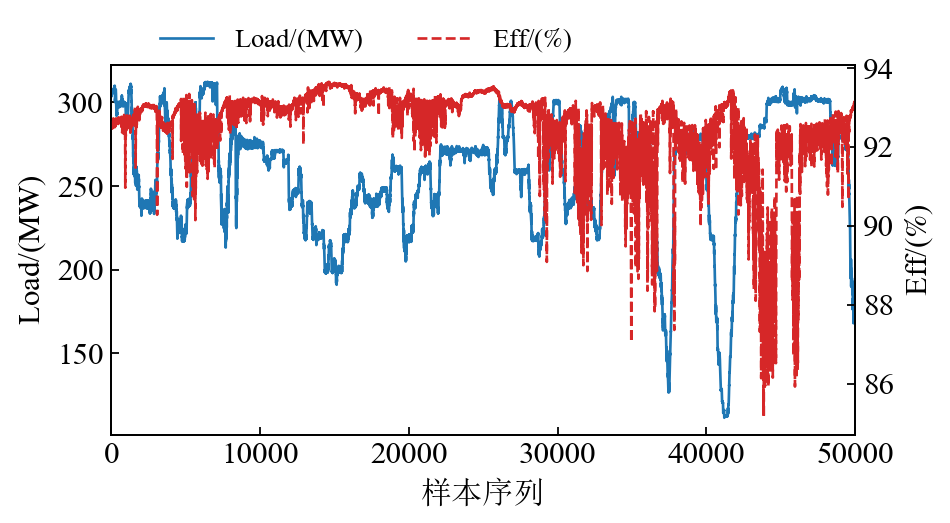

In [43]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family": "times new roman",
    "font.size": 14,
    "mathtext.fontset": "stix",
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
linesyle_list = ['-', '-', '--', ':']
fig, ax1 = plt.subplots(1, 1, figsize=(6, 3), dpi=160)

ax1.plot(np.arange(len(load)),
        load,
        color=color_list[1],
        linestyle=linesyle_list[1],
        linewidth=1.2)
ax1.set_xlabel("样本序列", {"family":"SimSun"})
ax1.set_ylabel("Load/($\mathrm{MW}$)", {"family":"times new roman"})   
ax1.set_xlim([0, 50000])
    
ax2 = ax1.twinx()
ax2.plot(np.arange(len(target_eff)),
        target_eff*100,
        color=color_list[4],
        linestyle=linesyle_list[2],
        linewidth=1.2)
ax2.set_ylabel("Eff/($\mathrm{\%}$)", {"family":"times new roman"})    
legend_font = {"family": "times new roman", "size": 12}
fig.legend(["Load/($\mathrm{MW}$)", "Eff/($\mathrm{\%}$)"], frameon=False, bbox_to_anchor=(0.63, 1.01), ncol=2, prop=legend_font)

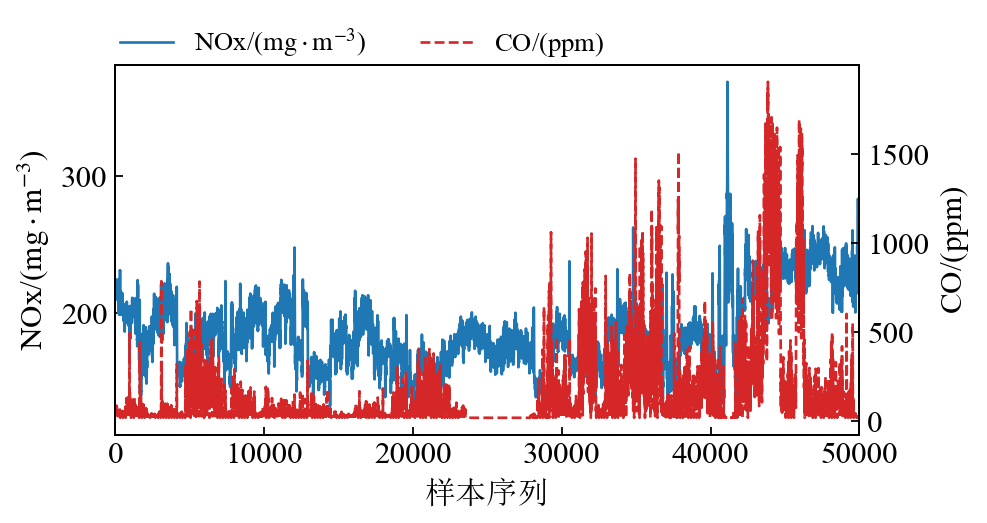

In [34]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family": "times new roman",
    "font.size": 14,
    "mathtext.fontset": "stix",
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
linesyle_list = ['-', '-', '--', ':']
fig, ax1 = plt.subplots(1, 1, figsize=(6, 3), dpi=160)

ax1.plot(np.arange(len(target_nox)),
        target_nox,
        color=color_list[1],
        linestyle=linesyle_list[1],
        linewidth=1.2)
ax1.set_xlabel("样本序列", {"family":"SimSun"})
ax1.set_ylabel("NOx/($\mathrm{mg \cdot m^{-3}}$)", {"family":"times new roman"})   
ax1.set_xlim([0, 50000])
    
ax2 = ax1.twinx()
ax2.plot(np.arange(len(target_co)),
        target_co,
        color=color_list[4],
        linestyle=linesyle_list[2],
        linewidth=1.2)
ax2.set_ylabel("CO/($\mathrm{ppm}$)", {"family":"times new roman"})   
legend_font = {"family": "times new roman", "size": 12}
fig.legend(["NOx/($\mathrm{mg \cdot m^{-3}}$)", "CO/($\mathrm{ppm}$)"], frameon=False, bbox_to_anchor=(0.66, 1.01), ncol=2, prop=legend_font)

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family": "times new roman",
    "font.size": 14,
    "mathtext.fontset": "stix",
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
linesyle_list = ['-', '-', '--', ':']


'''
定义画图可视化模版
'''
def plot_curve(data: dict):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=160)
    for i in range(len(data["x"])):
        ax.plot(data["x"][i],
                data["y"][i],
                color=color_list[i+1],
                linestyle=linesyle_list[i],
                linewidth=1.2)

    if data.get("ylim"):
        ax.set_ylim(data["ylim"])
    else:
        ax.set_ylim([np.percentile(data["y"][i], 0.5), np.percentile(data["y"][i], 99.5)])
    if data.get("xlim"):
        ax.set_xlim(data["xlim"])
    if data.get("xlabel"):
        ax.set_xlabel(data["xlabel"], {"family":"SimSun"})
    if data.get("ylabel"):
        ax.set_ylabel(data["ylabel"], {"family":"times new roman"})
    if data.get("xticks"):
        ax.set_xticks(data["xticks"])
    if data.get("legend"):
        legend_font = {"family": "SimSun", "size": 12}
        fig.legend(data["legend"], frameon=False, bbox_to_anchor=(0.5, 1.01), ncol=2, prop=legend_font)
    plt.show()

curve_data = {
    "x": [np.arange(len(nox))],
    "y": [nox],
    "ylim": [40, 600],
    "xlim": [0, 50000],
    "xlabel": "样本点",
    "ylabel": "NOx/($\mathrm{mg \cdot m^{-3}}$)"
}

from filter import *
nox_data_valider = DataValid(min_value=80, max_value=500, step_limit=20, step_value=2)
nox_data_filter = MedianFilter(kernel_size=5)

nox_valid = nox_data_valider.apply(np.array(nox))
nox_filter = nox_data_filter.apply(nox_valid)

curve_data = {
    "x": [np.arange(len(nox_filter)), np.arange(len(nox_filter))],
    "y": [load, target_co],
    "ylim": [80, 350],
    "xlim": [0, 50000],
    "xlabel": "样本点",
    "ylabel": "NOx/($\mathrm{mg \cdot m^{-3}}$)",
    "legend": ["负荷", "CO"],
}
plot_curve(curve_data)

NameError: name 'nox' is not defined